In [5]:
import argparse
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import warnings
warnings.filterwarnings('ignore')

In [2]:
def DFT_coeff(image, hor=None, ver=None):
    
    
    dim1, dim2 = image.shape
    # compute the DFT of the grayscale version of the input image
    image_dft = np.fft.fft2(image)
    
    # if no limits, take all components
    if(hor != None):
#         image_dft = np.fft.ifftshift(np.fft.fftshift(image_dft)[((dim1/2)-hor/2):(dim1/2)+hor/2,((dim2/2)-ver/2):(dim2/2)+ver/2])
        image_dft = np.fft.ifftshift(np.fft.fftshift(image_dft)[((dim1/2)-hor/2)+1:(dim1/2)+hor/2,((dim2/2)-ver/2)+1:(dim2/2)+ver/2])
    
    # compute the IDFT of the magnitude of the image's DFT
    image_dft_mag = np.absolute(image_dft)
    image_idft_mag = np.fft.ifft2(image_dft_mag)

    # compute the IDFT of the phase of the image's DFT
    image_dft_phase = image_dft / image_dft_mag
    image_idft_phase = np.fft.ifft2(image_dft_phase)
    return fix_image(np.absolute(image_idft_mag)), fix_image(np.absolute(image_idft_phase))
        
    

In [3]:
def fix_image(image):
    #hist_equalization

    # clip all negative values to 0
    image = image.clip(min=0)

    # scale within the interval [0,255]
    image *= 255 / np.max(image)

    # calculate image histogram, with 256 bins returning probability density of each bin
    image_histogram, bins = np.histogram(image.flatten(), 256, normed=True)
    
    # compute the image's cumulative distribution function (CDF)
    cdf = image_histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    # use linear interpolation of the CDF to adjust the image
    return np.interp(image.flatten(), bins[:-1], cdf).reshape(image.shape)

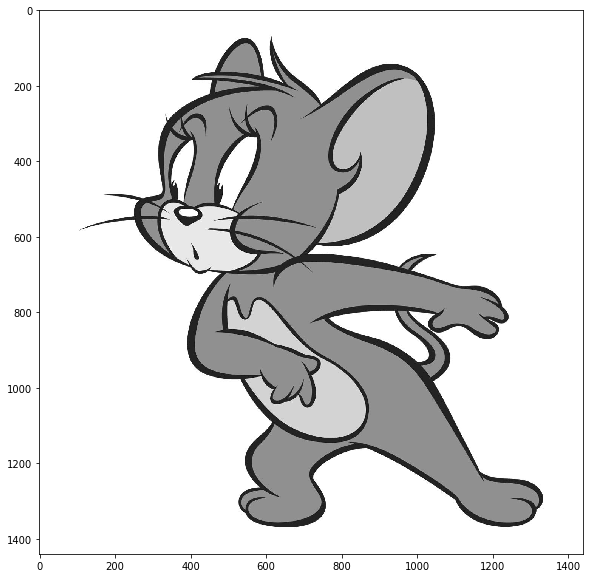

In [6]:
image = cv2.imread('5.jpg',0)
plt.imshow(image, cmap='gray')
plt.show()

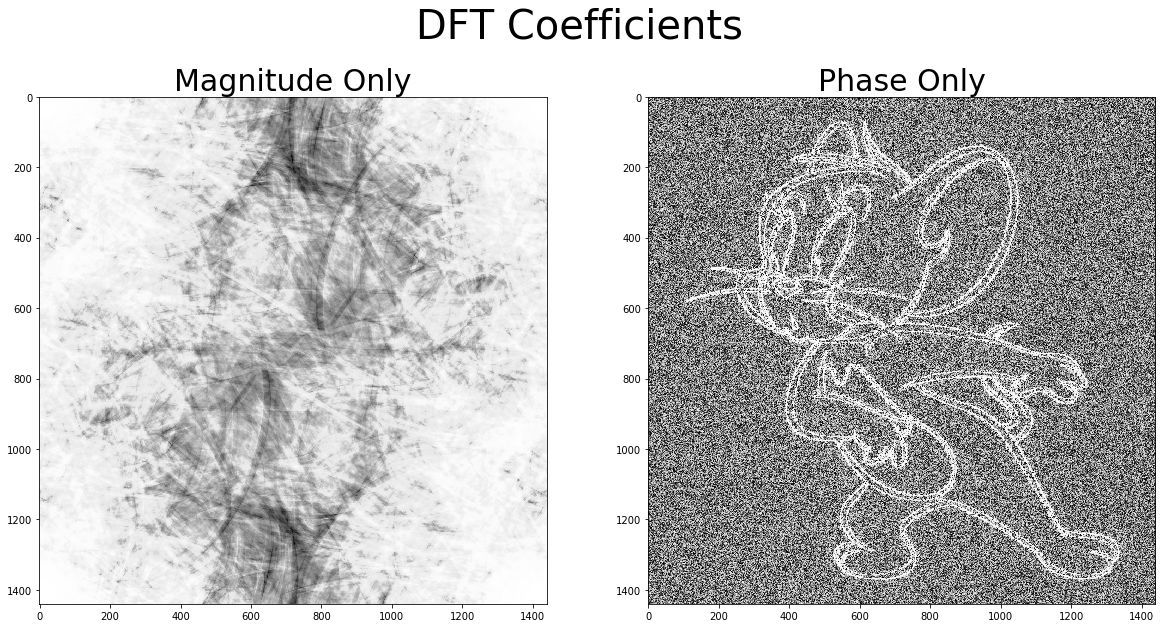

In [7]:
mag, phase = DFT_coeff(image)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('DFT Coefficients', fontsize=40)
ax1.set_title('Magnitude Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(mag, cmap='gray')
ax2.set_title('Phase Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im2 = ax2.imshow(phase, cmap='gray')
plt.show()

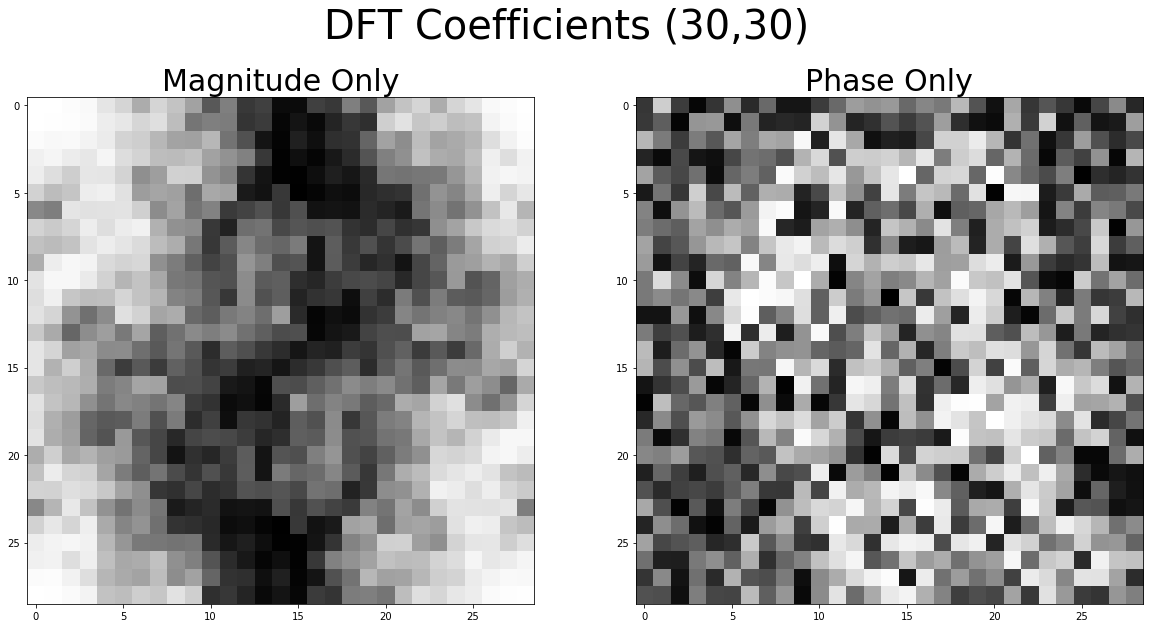

In [8]:
mag, phase = DFT_coeff(image,30,30)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('DFT Coefficients (30,30)', fontsize=40)
ax1.set_title('Magnitude Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(mag, cmap='gray')
ax2.set_title('Phase Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im2 = ax2.imshow(phase, cmap='gray')
plt.show()

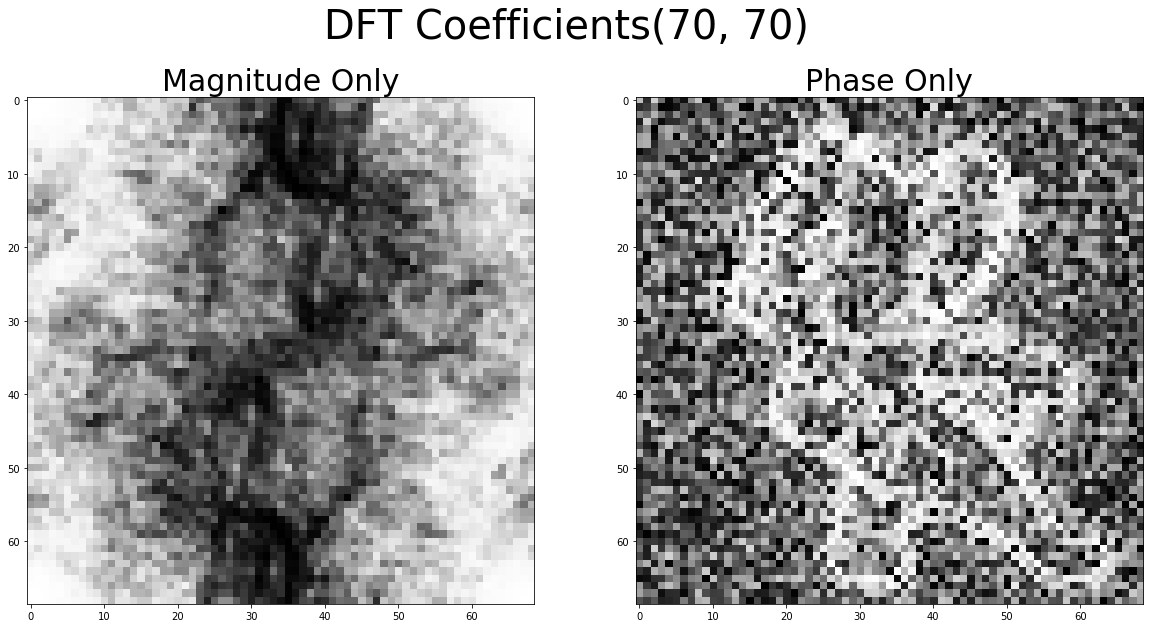

In [9]:
mag, phase = DFT_coeff(image,70,70)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('DFT Coefficients(70, 70)', fontsize=40)
ax1.set_title('Magnitude Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(mag, cmap='gray')
ax2.set_title('Phase Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im2 = ax2.imshow(phase, cmap='gray')
plt.show()

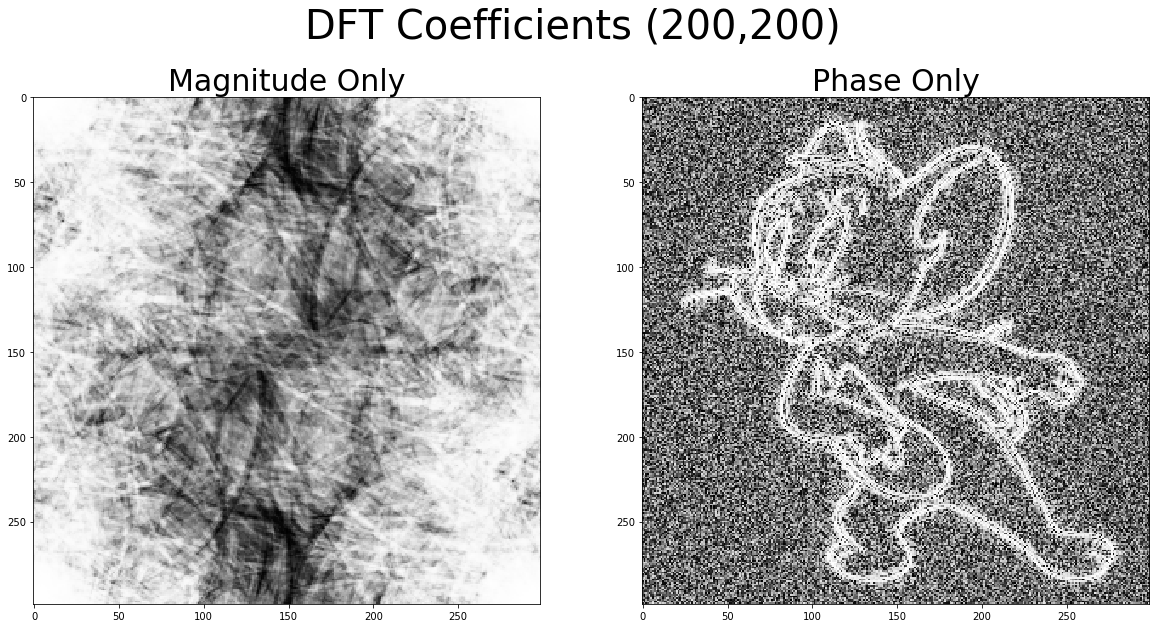

In [10]:
mag, phase = DFT_coeff(image,300,300)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('DFT Coefficients (200,200)', fontsize=40)
ax1.set_title('Magnitude Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(mag, cmap='gray')
ax2.set_title('Phase Only', fontsize=30)
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im2 = ax2.imshow(phase, cmap='gray')
plt.show()